In [1]:
import utility as utility
import loader as loader
import numpy as np

In [2]:
def nearest_neighbour_heuristic(px, py, demand, capacity, depot):

    """
    Algorithm for the nearest neighbour heuristic to generate VRP solutions.

    :param px: List of X coordinates for each node.
    :param py: List of Y coordinates for each node.
    :param demand: List of each nodes demand.
    :param capacity: Vehicle carrying capacity.
    :param depot: Depot.
    :return: List of vehicle routes (tours).
    """

    routes = list()
    visited = set([depot])
    while(len(visited) != len(px)):
        currentRoute = list()
        currentDemand = 0
        lastNode = depot
        
        #creates a route
        while(currentDemand < capacity):
            
            minDist = float('inf')
            index = -1
            for i in range(len(px)): #for each node
                if((i in visited) or (demand[i] + currentDemand > capacity)):
                    continue
                distance = utility.calculate_euclidean_distance(px, py, i, lastNode)
                #print(distance)
                if(distance < minDist):
                    minDist = distance
                    index = i
            if(index < 0):
                break
            visited.add(index)
            currentRoute.append(index)
            currentDemand += demand[index]
            lastNode = index
            
        routes.append(currentRoute)
    return routes

In [3]:
def savings_heuristic(px, py, demand, capacity, depot):

    """
    Algorithm for Implementing the savings heuristic to generate VRP solutions.

    :param px: List of X coordinates for each node.
    :param py: List of Y coordinates for each node.
    :param demand: List of each nodes demand.
    :param capacity: Vehicle carrying capacity.
    :param depot: Depot.
    :return: List of vehicle routes (tours).
    """

    # TODO - Implement the Saving Heuristic to generate VRP solutions.
    routes = list()
    demands = list()
    
    distances = list() #list of distances from depot to each node
    for i in range(len(px)):
        if(i == depot):
            distances.append(0)
            continue
        routes.append([i])
        demands.append(demand[i])
        distances.append(utility.calculate_euclidean_distance(px, py, i, depot))
    
    savings = [[0 for i in range(len(px))] for j in range(len(px))]
    for i in range(len(px)):
        for j in range(len(py)):
            if(i == j):
                continue
            savings[i][j] = distances[i] + distances[j] - utility.calculate_euclidean_distance(px, py, i, j)
            
    while True:
        bestSaving = float('-inf')
        index1 = -1
        index2 = -1
        #loops through routes to find the best merge
        for i in range(len(routes)):
            for j in range(len(routes)):
                if(i == j or demands[i] + demands[j] > capacity):
                    continue
                iEndNode = routes[i][-1]
                jStartNode = routes[j][0]
                if(savings[iEndNode][jStartNode] > bestSaving):
                    bestSaving = savings[iEndNode][jStartNode]
                    index1 = i
                    index2 = j

        if(index1 < 0):
            break
        routes[index1].extend(routes[index2])
        demands[index1] += demands[index2]
        routes.pop(index2)
        demands.pop(index2)
        
    return routes

32
Best VRP Distance: 787.8082774366645


C:\Users\Kevin\OneDrive - Victoria University of Wellington - STUDENT\Documents\Comp307\Assignment 4\python\src\utility.py:85: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "co" (-> color='c'). The keyword argument will take precedence.
  plt.plot(px[a_route[i]], py[a_route[i]], 'co', markersize=5, color=cmap(k))
C:\Users\Kevin\OneDrive - Victoria University of Wellington - STUDENT\Documents\Comp307\Assignment 4\python\src\utility.py:87: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "co" (-> color='c'). The keyword argument will take precedence.
  plt.plot(px[a_route[-1]], py[a_route[-1]], 'co', markersize=5, color=cmap(k))


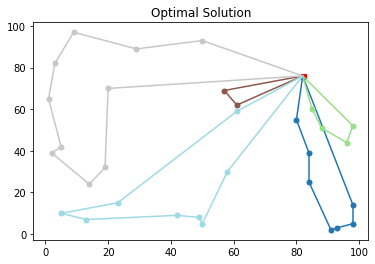

Nearest Neighbour VRP Heuristic Distance: 1146.3996317253793


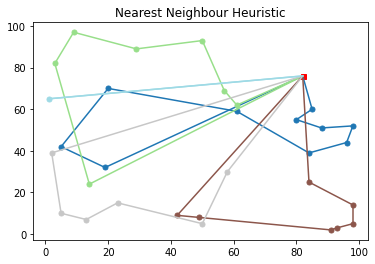

Saving VRP Heuristic Distance: 843.6881693466271


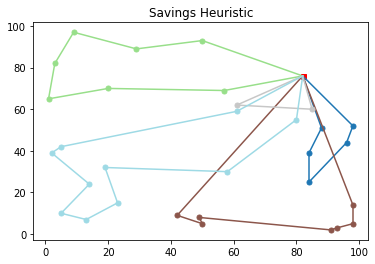

In [4]:
# Paths to the data and solution files.
vrp_file = "n32-k5.vrp"  # "data/n80-k10.vrp"
sol_file = "n32-k5.sol"  # "data/n80-k10.sol"

# Loading the VRP data file.
px, py, demand, capacity, depot = loader.load_data(vrp_file)
print(len(px))

# Displaying to console the distance and visualizing the optimal VRP solution.
vrp_best_sol = loader.load_solution(sol_file)
best_distance = utility.calculate_total_distance(vrp_best_sol, px, py, depot)
print("Best VRP Distance:", best_distance)
utility.visualise_solution(vrp_best_sol, px, py, depot, "Optimal Solution")

# Executing and visualizing the nearest neighbour VRP heuristic.
# Uncomment it to do your assignment!

nnh_solution = nearest_neighbour_heuristic(px, py, demand, capacity, depot)
#print(nnh_solution)
nnh_distance = utility.calculate_total_distance(nnh_solution, px, py, depot)
print("Nearest Neighbour VRP Heuristic Distance:", nnh_distance)
utility.visualise_solution(nnh_solution, px, py, depot, "Nearest Neighbour Heuristic")

#Executing and visualizing the saving VRP heuristic.
# Uncomment it to do your assignment!

sh_solution = savings_heuristic(px, py, demand, capacity, depot)
#print(sh_solution)
sh_distance = utility.calculate_total_distance(sh_solution, px, py, depot)
print("Saving VRP Heuristic Distance:", sh_distance)
utility.visualise_solution(sh_solution, px, py, depot, "Savings Heuristic")